<h1>Fluorescence Anisotropy Analysis</h1>

<h2>Competition Experiments</h2>

In competition expeirments the binding constants of unlabelled peptide (competitor) is determiend. An example fluorescence anisotropy data analysis from a competition experiment with four unlabelled peptides is presented below. The workflow and commands differ sligthly from the protein/titration assay workflow. The differnces are in curve fitting and plotting commands. Please note that the dissociation constant of a fluorescent tracer is needed to complete the analysis.

<h2>Installing the package</h2>

The `fluanisotropyanalysis` package can be downloaded from PyPI software repository and installed (along with dependencies) using the following command:

`pip install fluanisotropyanalysis`

<h3>Importing the package</h3>

To access the functionality of the `fluanisotropyanalysis` package, import it using the folowing line:

In [1]:
from fluanisotropyanalysis.flu_ani_analysis import FA

<h2>Importing raw data</h2>

You can import the raw data in csv format that was exported from Perkin Elmer Envision instruments using the `read_in_envision` function. The following formats are supported: *list A*, *list B*, *list C*, *plate 1* and *plate 2*, and plate sizes of 96 and 384 wells. The `data_type` argument can be either `'plate'` for any of the plate formats or `'list'` for any of the list formats.

Reading in the data requires a separate plate map file that contains information about contents of every well such as protein name, tracer name, protein concentration, etc. The *Protein Name*, *Tracer Name* and *Competitor Name* columns are all required to be filled to allow for the successful analysis as are their concentrations (in the same units). The *Type* column should specify whether the well is a control (*blank*) or a test well.

In [2]:
comp_data = 'competition_experiment_data_set.csv'       # Note that this will only work if the files are in the same folder
comp_platemap = 'competition_experiment_platemap.csv'   # as this Jupyter notebook,
                                                        # alternatively you can provide a full file path

my_data = FA.read_in_envision(data_csv=comp_data, platemap_csv=comp_platemap, data_type='plate', size=384)

Data was uploaded!

Number of repeats: 1 
Value of g-factor: 1.0 
Overall number of empty cells is 128 in 2 data frames.
Proteins: ['Protein']
Tracers: ['Tracer']
Competitors: ['Competitor 1' 'Competitor 2' 'Competitor 3' 'Competitor 4']



<h2>Visualising the data for each well</h2>

You can display the contents of each well (both the imported data and data from platemap) using the `visualise` function. 

The `labelby` argument specifes what is displayed on the well and `colorby` argument controls its color. All the platemap column names such as *Type*, *Contents*, *Protein Name*, *Protein Concentration*, *Tracer Name*, *Tracer Concentration* can be passed as `labelby` and `colorby` arguments. To display the imported data such as *p* and *s* channel intensity, pass a tuple of repeat number and the specified variable, e.g. `labelby=('repeat_1, 'p')`.

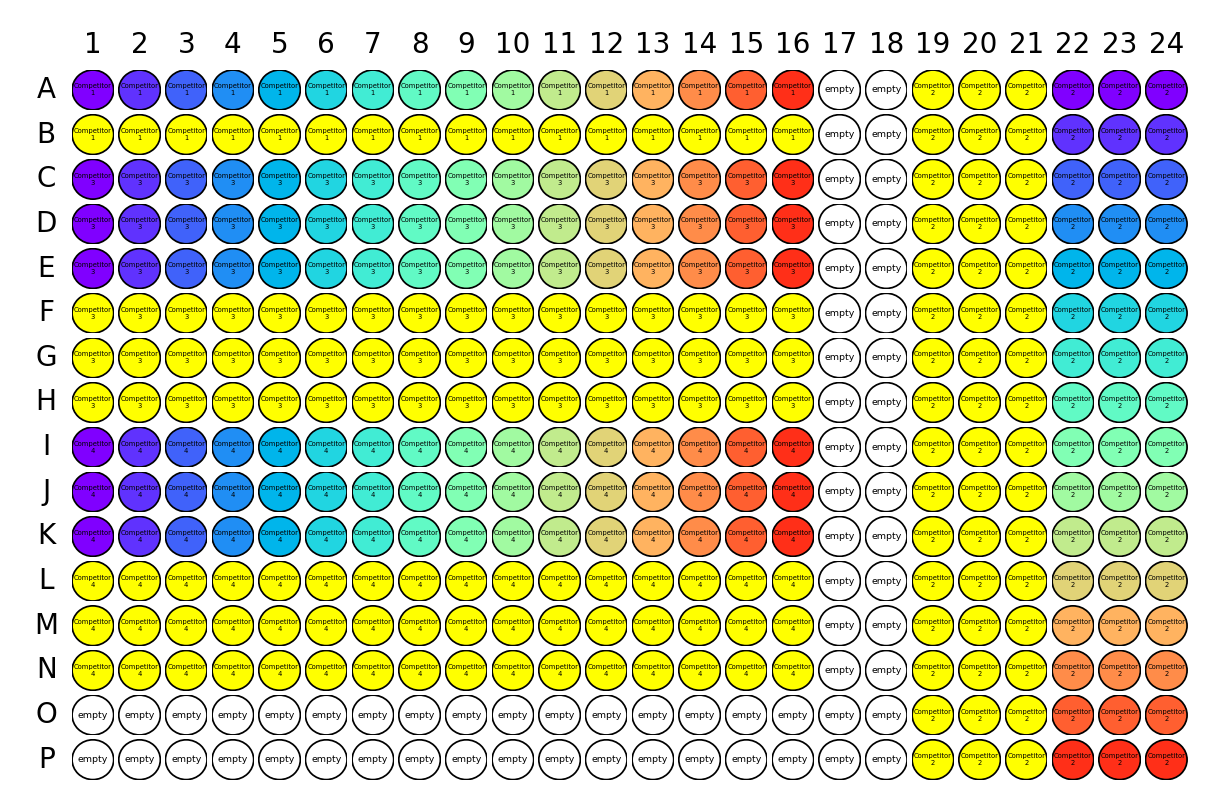

In [6]:
my_data.visualise(labelby='Competitor Name', colorby='Competitor Concentration')

<h2>Invalidation</h2>

You can invalidate individual `wells` and/or entire `rows` or `columns` by passing any of those three keyword arguments or their combination to the `invalidate` function. The invalidated wells will not be taken into consideration in subseqent calculations or displayed on the graphs. They can be made valid again by additionally passing the `valid=True` argument. If you invalidate well after performing some calulations (e.g. background correction or caluculation of anisotropy) you have execute the calculations again for the effect to take place.

<h2>Background correction</h2>

To calculate the background corrected values for *p* and *s* channel intensity in all repeats use the `background_correct` function.

The backgorund correction is done by subtracting the mean value of blank *p* (or *s*) channel intensity for a given competitor concentration from each non-blank value of the *p* (or *s*) channel intensity for that concentration. 

To display the background corrected values on the platemap use the *p_corrected* or *s_corrected* as a variable along the repeat number in the `visualise` function (e.g. `labelby=('repeat_2', 'p_corrected')`).

Background correction can be performed multiple times on a sigle data set, the existing corrected data will be overwritten.

In [7]:
my_data.background_correct()

Background correction was successfully performed!


<h2>Anisotropy and intensity calculation</h2>

The `calc_r_i` function calculates the anisotropy and intensity for each well in all repeats using the following formulas:

<p>$I = s + 2gp$</p>

<p>$r = \frac{s - gp}{I}$</p>

<p>Where <em>I</em> is fluorescence intensity, <em>r</em> is anisotropy, <em>g</em> is g factor, <em>p</em> is p channel intensity, <em>s</em> is s channel intensity.</p>
         
If the `correct=False` argument is passed the anisotropy an fluorescence inensity will only be calculated using the raw *p* and *s* channel values and not the background corrected values. The variables for the `visualise` funtion are: *i_raw*, *r_raw*, *i_corrected* and *r_corrected*.

The functinon also calculates the percentage intesity of the non blank well as comapred to the blank corrected wells. By default the plot of the percentage intenstiy against the well ids for all repeats is displayed along with a summary of wells above the threshold (defaults to 80%), however it can be turned off by passing the `plot_i=False` argument.

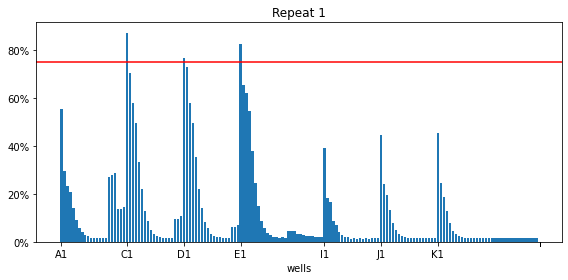

In the following wells the percentage intensity value was above the 75% threshold:
	Repeat 1: ['C1', 'D1', 'E1']



In [9]:
my_data.calc_r_i(thr=75)

The anisotropy data can be displayed on the platemap using *i_percent* as a variable name. If the variable passed to the `colorby` function is a numerical variable, the well colours are generated based on lineraly scaled values of that varaible so that they represent the magniude of the number (the purple colour represnting the smallest numer and the red colour the largerst numers). The `visualise` function can also scale the data for wells color-coding logarithmically (`scale='log'`) instead of default linear scaling.

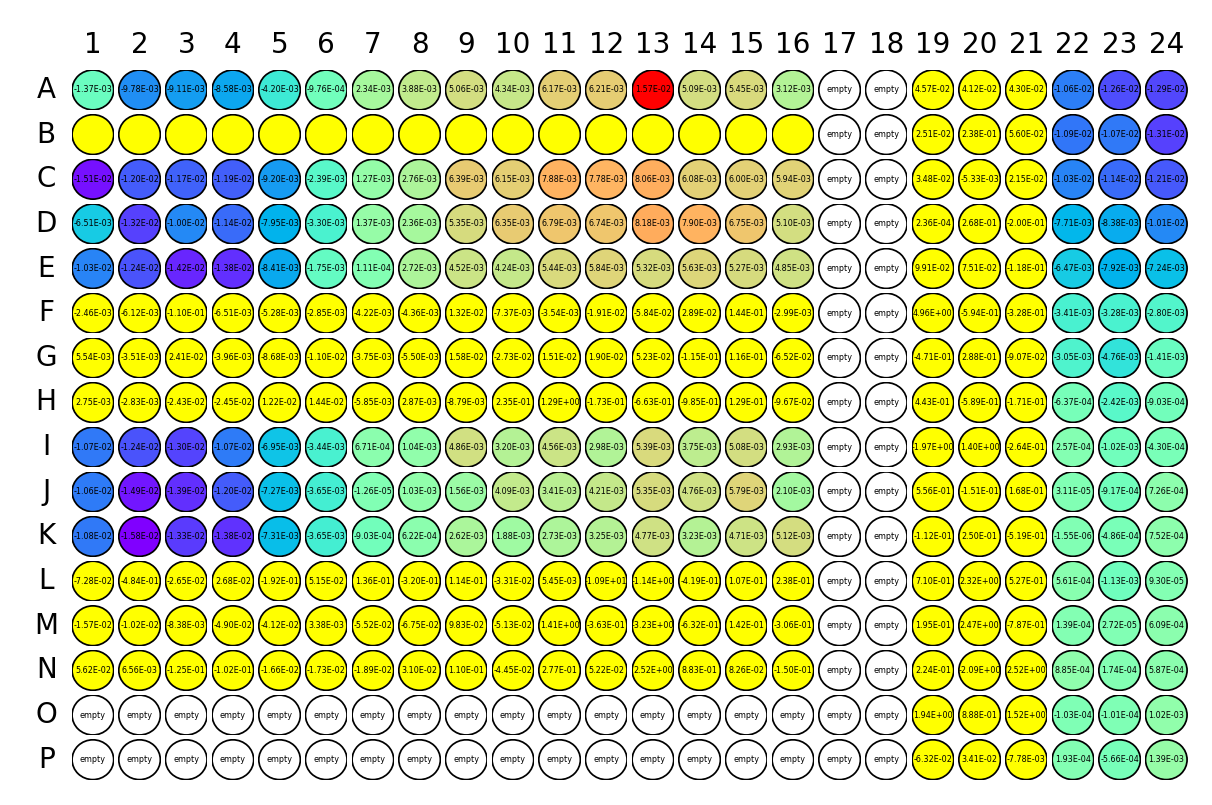

In [10]:
my_data.visualise(colorby=('repeat_1', 'r_corrected'), labelby=('repeat_1', 'r_corrected'))

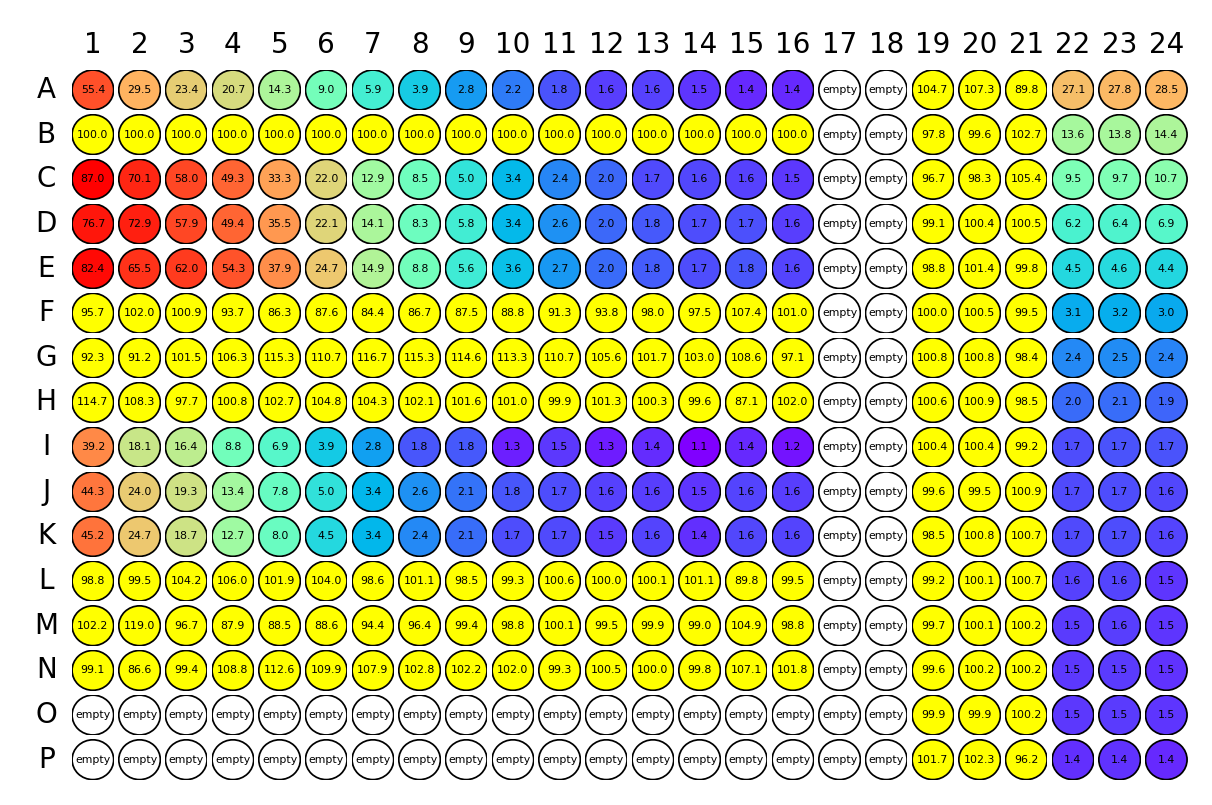

In [14]:
my_data.visualise(colorby=('repeat_1', 'i_percent'), labelby=('repeat_1', 'i_percent'), scale='log')

<h2>Mean anisotropy and intensity calculation</h2>

To calculate the mean anisotropy and intensity along with their standard deviation and standrad error for all replicates for a given competitor concentration use `calc_mean_r_i` function. This data is required for subsequent curve fitting.

In [12]:
my_data.calc_mean_r_i()

The mean anisotropy and intensity were successfully calculated.


<h2>Logistic curve fitting</h2>

The `logistic_fit_com` functinon fits a logistic curve to the plot of anisotropy against competitor concentration using the following formula:

<p>$r = \frac{r_{max} - r_{min}}{1 + \bigl( \frac{p} {IC_{50}} \bigl) ^{hill}} + r_{min}$</p>

<p>Where <em>p</em> is competitor concentration, <em>r<sub>max</sub></em> is the upper limit of anisotropy, <em>r<sub>min</sub></em> is the lower limit of anisotropy, <em>IC<sub>50</sub></em> is midpoint of transition, <em>hill</em> is the slope.</p>

By default, the curve fitting is done for all competitors in all repeats. However, you can use the `prot`, `trac`, `rep` and `com` arguments to specify lists of protein, tracer and competitor names for which the fitting will be performed. For example, to do the fitting only for the *Competitor 2*  and *Competitor 3*, pass `com=['Competitor 2', 'Competitor 3']`.

The `curve_fit` function from SciPy module is used to do the curve fitting and so all arguments accepted by this function can be passed as keyword arguments to the `logistic_fit` function. The exception is `sigma` argument which is passed as either `sigma='std'` or `sigma='sem'` to perform the curve fitting taking into account the specified errors.

In [15]:
my_data.logisitc_fit_com()

The logistic curve fitting was successfully performed.


If the curve fitting fails for any competitor, a warning with deatils is provided. In such cases, try repeating the curve fitting for only the failed data passing additional keyword arguments such as `sigma`, `p0`, `bounds`, etc.

You can display the plots of anisotropy against competitor concentration with a fitted logisitc curve for all repeats using the `plot_ani_com` function (the `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`).

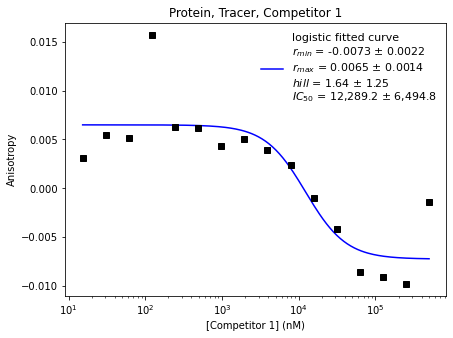

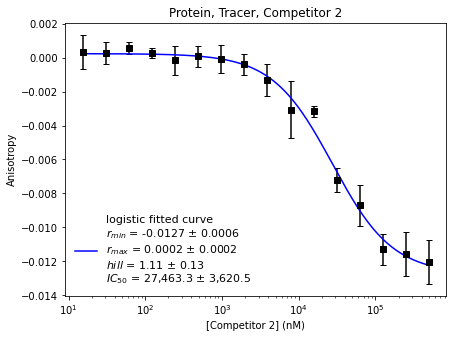

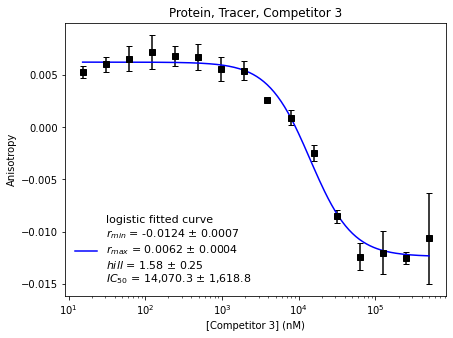

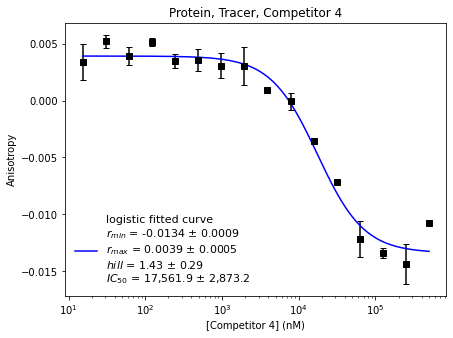

In [16]:
my_data.plot_ani_com()

By default, results for all competitors in all repeats are plotted. You can use the `prot`, `trac`, `com`, and `rep`  arguments to specify lists of protein, tracer and competitor names and repeats for which the data will be plotted.

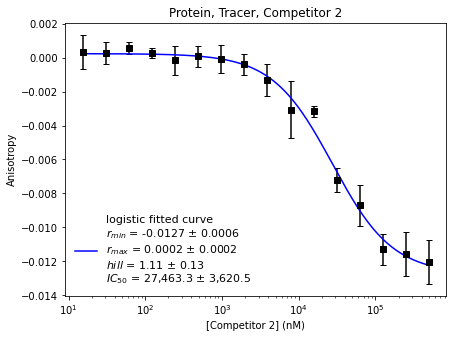

In [17]:
my_data.plot_ani_com(com=['Competitor 2'])

## Importing the fitting parameters from protein/tracer titration

To calcualte the amount of fluorescent trcaer bound to the target protein the limits of anisotropy determined in the protein/tracer titration have to be imported into the `final_fit` data frame. This is done using the `import_params` function which takes in a file path to the csv file containg the required data. This file can be generted using the `export_params` function in the protein/tracer titration notebook and should also contain the binding constant (Kd) since it is needed in later stages. Please note that the protein and tracer names must be the same in the imported data frame as they are in the competitor platemap.

In [21]:
my_data.import_params("final_fit_params_for_comp_experiemnt.csv")

In [22]:
my_data.final_fit

rmin  rmin error      rmax  rmax error  \
Protein Tracer Competitor 1 -0.011513    0.000356  0.124883    0.001465   
               Competitor 2 -0.011513    0.000356  0.124883    0.001465   
               Competitor 3 -0.011513    0.000356  0.124883    0.001465   
               Competitor 4 -0.011513    0.000356  0.124883    0.001465   

                             lambda           Kd    Kd error  
Protein Tracer Competitor 1     1.0  8782.305653  238.431649  
               Competitor 2     1.0  8782.305653  238.431649  
               Competitor 3     1.0  8782.305653  238.431649  
               Competitor 4     1.0  8782.305653  238.431649

<h2>Amount of tracer bound calculation</h2>

The `calc_amount_bound` function calculates the amount of fluorescent tracer bound to the protein using the following formula:

$L_{B} = \Bigl( \frac {\lambda(r_{max}-r)} {r-r_{min}} +1 \Bigl) ^{-1} L_{T}$

Where <em>L<sub>B</sub></em> is the concentration of fluorescent tracer bound to the target protein, <em>L<sub>T</sub></em> is the total tracer concentration, <em>&#955;</em> is the difference in quantum yields between bound and free states, <em>r</em> is the anisotropy, <em>r<sub>max</sub></em> is the upper limit of anisotropy, <em>r<sub>min</sub></em> is the lower limit of anisotropy. 

The mean value of anisotropy for all replicates (if present) for a given competitor concentration is used in this calculation. The standard deviation and standard error are also calculated. 

In [23]:
my_data.calc_amount_bound()

The amount of fluorescent tracer bound was successfully calculated.


<h2>Sigle site curve fitting</h2>

The `single_site_fit_com` functinon fits a logistic curve to the plot of amunt bound against competitor concentration using the following formula:

<p>$r = \frac{Max - Min}{1 + \bigl( \frac{p} {IC_{50}} \bigl) ^{hill}} + Min$</p>

<p>Where <em>p</em> is competitor concentration, <em>Max</em> is the upper limit of the amount bound, <em>Min</em> is the lower limit of the amount bound, <em>IC<sub>50</sub></em> is midpoint of transition, <em>hill</em> is the slope.</p>

By default, the curve fitting is done for all competitors in all repeats. However, you can use the `prot`, `trac`, `com`,  and  `rep`  arguments to specify lists of protein, tracer and competitor names and repeats for which the fitting will be performed.

The `curve_fit` function from SciPy module is used to do the curve fitting and so all arguments accepted by this function can be passed as keyword arguments to the `single_site_fit` function. The exception is `sigma` argument which is passed as either `sigma='std'` or `sigma='sem'` to perform the curve fitting taking into account the specified errors.

In [24]:
my_data.single_site_fit_com()

The single site curve fitting was successfully performed.


If the curve fitting fails for any of the protein-tracer pairs, a detailed warning is provided. In such cases, try fitting again passing additional arguments such as `sigma`, `p0`, `bounds`, etc.

<h2>Calculation of the competitor binding constants (K<sub>i</sub>)</h2>

The `plot_ic50` function calculates the binding constant (K<sub>i</sub>) for each competitor and displays it along with the IC<sub>50</sub> value on the figures. The following methodology is used to obtain the the binding constants.

First, the concentration of unbound protein at zero inhibitor (competitor) concentration (P<sub>0</sub>) is calculated from:

$P_0 = \frac{ -(K_d + L_T - P_T) + \sqrt{ (K_d + L_T - P_T)^2 - 4P_TL_T } }{2}$

Where K<sub>d</sub> is the dissociation constnat of the fluorescent tacer, L<sub>T</sub> is the total tracer concentration (taken from the platemap) and P<sub>T</sub> is the total protein concentration (taken from the platemap). 

Next, the concentration of unbound fluorescent tracer at the IC<sub>50</sub> point (L<sub>50</sub>) is calculated from:

$L_{50} = L_T - \frac{P_T-P_0}{2} $

Where L<sub>T</sub> is the total tracer concentration, P<sub>T</sub> is the total protein concentration and P<sub>0</sub> is the concentration of the unbound protein at zero competitor concentration.

The concentration of unbound competitor at the IC<sub>50</sub> point (<sub>I50</sub>) is calculated from:

$I_{50} = IC_{50} - P_T +  \bigl( \frac{P_T - P_0}{2} \bigl) \bigl( 1 + \frac{K_d}{L_{50}} \bigl)$

Where IC<sub>50</sub> is determined from the curve fitting of competitor titration, P<sub>T</sub> is the total concentration of protein and K<sub>d</sub> is the dissociation constant of fluorescent tracer, L<sub>50</sub> and P<sub>0</sub> are calculated from equations above. 

The dissociation constant of the unlabelled peptide (competitor) is calculated from:

$K_i = \frac{I_{50}}{ \frac{L_{50}}{K_d} + \frac{P_0}{K_d} + 1 }$

The above procedure calcualtes the K<sub>i</sub> based on the total protein concentration stated in the platemap. 

<h3>Calculation of K<sub>i</sub>*</h3>
The K<sub>i</sub>* the dissociation constant calculated based on the total protein concentration calculated from the measured anisotropy.

Assuming the single site binding model the binding constant can be expressed as:

$K_d = \frac{P\times L}{PL} = \frac{(P_T-PL)(L_T-PL)}{PL}$

Where, P is the protein concentration, L is fluorescent tracer concentration, P<sub>T</sub> is the total protein concentration, L<sub>T</sub> is the total fluorescent tracer concentration, PL is the concentration of the protein-tracer complex.

After rearrangement:

$P_T = \frac{K_dP_L}{L_T - P_L} + P_L$

The concentration of the protein-tracer complex is taken as the upper asymptote of a curve fitted to the plot of concentration of fluorescent tracer bound against the competitor concentration. The total protein concentration (L<sub>T</sub>) obtained in this way is then used to caclculate the K<sub>i</sub>* instead of the L<sub>T</sub> from the platemap.

<h3>K<sub>i</sub> error calculation</h3>
The error in K<sub>i</sub> and K<sub>i</sub>* is obtained using a simulation since it involves the error in the measurement of the K<sub>d</sub> of the tracer and the IC<sub>50</sub> of the competitor. A series of 100,000 simulations are run with a simulated value of K<sub>d</sub> and IC<sub>50</sub> generated around the observed mean with the probability of the value occurring based on a normal distribution and standard deviation equal to the fitting error of each value. The simulated value of K<sub>i</sub> is then calculated with the error estimated from the standard deviation of the simulated results.

## IC<sub>50</sub> plotting

To plot the graphs of the concnetration of fluorescent tracer bound against the competitor concentration with a fitted curve and the calculated dissociation constnts, use the `plot_ic50` function. By defult, data for all repeats and competitors is plotted, however you can specifiy the protein, tracer and competitor names for which data is to be plotted using the `prot`, `trac` and `com` arguments. The `err` argument specifes data used to display error bars, can be either `'std'` or `'sem'`.

The Ki* is calculated based on the total protein concentration calculated from the measured anisotropy. Below each figure the values of total protein concentration from platemap (LT) and as calculated from measured anisotropy (LT*) are stated.


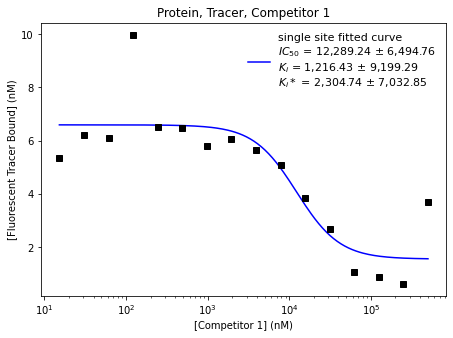

LT = 5,000.0 nM, LT* = 1,341.3 nM


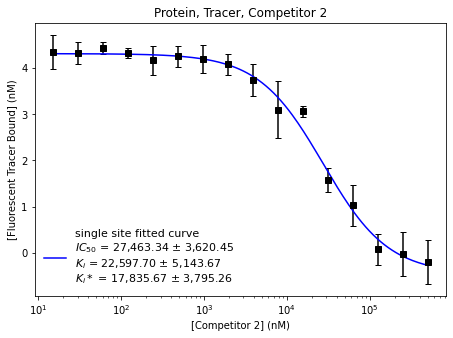

LT = 5,000.0 nM, LT* = 832.1 nM


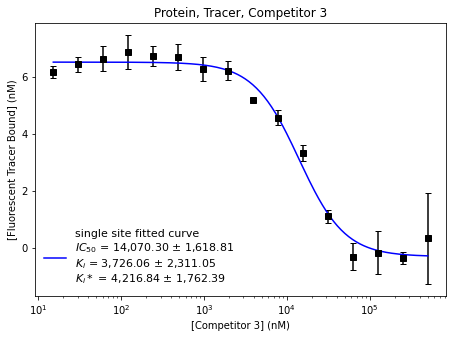

LT = 5,000.0 nM, LT* = 1,319.8 nM


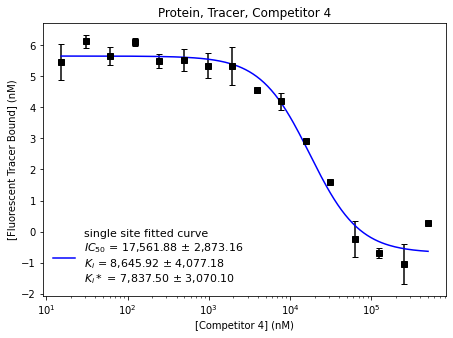

LT = 5,000.0 nM, LT* = 1,125.5 nM


In [25]:
my_data.plot_ic50()

To save the graphs either pass the `export=True` to save them in the same location as this notebook or pass a string with a path to preferred directory (e.g. `export="C:\\folder1\\folder2\\"` for Windows OS)

<h3>Exporting the fitting parameters</h3>

The `export_params` function exports the `final_fit`, `fit_params` and `fit_params_com` data frames from each repeat as csv (`file_type='csv'`) or Excel (`file_type='excel'`) files. Optionally, you can povide a path to directory in which the files will be saved using the `path` argument.

In [ ]:
my_data.export_params()

## Exporting the data 

The `export_data` function exports anisotropy, intensity and amount bound data for proteins and tracer and or all repeats as an Excel file. ptionally, you can povide a path to directory in which the files will be saved using the `path` argument.

In [ ]:
my_data.export_data()

## Structure of the data dictionary

Data imported from raw data files and the results of subsequent calculations are stored in the `data_dict` which is a multilevel dictionary cotaining a separate dictionary for each repeat. The repeat dictionaries contain two items: data frame with `'metadata'` (date and time of recording the data, etc) and a `'data'` dictionary. The `'data'` dictionary contains data frames with anisotropy and intensity (raw and corrected), the `'fit_params'` data frame with fitting parameters resulting from the logisitc curve fitting, the `'fit_params_com'` data frame with fitting parameters resulting from the single site curve fitting and the following three dictionaries: `'r_mean'`, `'i_mean'` and `'amounnt_bound'`. Each of those dictioraies contains data frames with mean anisotropy, intensity and amount bound as values and 3-tuples (protein name, tracer name, competitor name) as keys.

In [28]:
my_data.data_dict['repeat_1']['data']['fit_params_com']

min min error      max  max error     IC50  \
Protein Tracer Competitor 1   1.55629  0.813478  6.59649   0.505323  12289.2   
               Competitor 2 -0.450008  0.209214  4.30682  0.0720446  27463.3   
               Competitor 3 -0.315064   0.24378  6.50422   0.141976  14070.3   
               Competitor 4  -0.68947  0.331076  5.65444   0.168598  17561.9   

                            IC50 error     hill hill error            Ki  \
Protein Tracer Competitor 1    6494.76  1.64245    1.24631   1216.434009   
               Competitor 2    3620.45  1.10774   0.133116  22597.696573   
               Competitor 3    1618.81   1.5764   0.249729   3726.058468   
               Competitor 4    2873.16  1.42688     0.2899   8645.917123   

                                Ki error           Ki*    Ki* error  
Protein Tracer Competitor 1  9199.285891   2304.744232  7032.846421  
               Competitor 2  5143.668436  17835.670306  3795.261086  
               Competitor 3  2311.052430   4216.838972  1762.391027  
               Competitor 4  4077.176792   7837.500983  3070.096973

In [29]:
my_data.data_dict['repeat_1']['data']['amount_bound'][('Protein','Tracer','Competitor 2')]

,Protein Name,Protein Concentration,Tracer Name,Tracer Concentration,Competitor Name,Competitor Concentration,mean,std,sem
16,Protein,5000.0,Tracer,50.0,Competitor 2,15.258789,4.344251,0.360793,0.208304
17,Protein,5000.0,Tracer,50.0,Competitor 2,30.517578,4.319657,0.236590,0.136595
18,Protein,5000.0,Tracer,50.0,Competitor 2,61.035156,4.421482,0.130795,0.075515
19,Protein,5000.0,Tracer,50.0,Competitor 2,122.070312,4.315108,0.113097,0.065296
20,Protein,5000.0,Tracer,50.0,Competitor 2,244.140625,4.162445,0.319610,0.184527
21,Protein,5000.0,Tracer,50.0,Competitor 2,488.281250,4.252708,0.228763,0.132077
22,Protein,5000.0,Tracer,50.0,Competitor 2,976.562500,4.200828,0.302235,0.174495
23,Protein,5000.0,Tracer,50.0,Competitor 2,1953.125000,4.074977,0.233474,0.134796
24,Protein,5000.0,Tracer,50.0,Competitor 2,3906.250000,3.736195,0.353092,0.203858
25,Protein,5000.0,Tracer,50.0,Competitor 2,7812.500000,3.094692,0.614257,0.354641
